In [2]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.7/ (Recommended version – 3.7).
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.23.5
pandas version:  1.5.3
seaborn version: 0.12.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# Linear Regression on Non-linear Data ([Moore's Law](https://en.wikipedia.org/wiki/Moore's_law)) (by making data linear using logarithm (log2) scale)

Direct Drive Link: https://drive.google.com/file/d/1Xy_FjAF1CXfIhc70Xty3aX70TWhEnzGP/view?usp=share_link

### download data

In [3]:
!gdown "1Xy_FjAF1CXfIhc70Xty3aX70TWhEnzGP"                                      # download file form google drive

Downloading...
From: https://drive.google.com/uc?id=1Xy_FjAF1CXfIhc70Xty3aX70TWhEnzGP
To: /content/cpu_law.csv
100% 5.51k/5.51k [00:00<00:00, 12.4MB/s]


### load data (as pandas dataframe) and see data stats and info

In [4]:
cpu_law=pd.read_csv('cpu_law.csv',index_col=0)                                  # read data (as csv file)
cpu_law.head()                                                                  # see head data (first five rows)

,Processor,Transistor count,Date of introduction,Designer,Process,Area
0,TMS 1000,8000,1971,Texas Instruments,8000.0,NaN
1,Intel 4004,2300,1971,Intel,10000.0,12.0
2,Intel 8008,3500,1972,Intel,10000.0,14.0
3,MOS Technology 6502,3510,1975,MOS Technology,8000.0,21.0
4,Motorola 6800,4100,1974,Motorola,6000.0,16.0


In [5]:
cpu_law.tail()                                                                  # see tail (last five rows)

,Processor,Transistor count,Date of introduction,Designer,Process,Area
97,Xbox One main SoC,5000000000,2013,Microsoft/AMD,28.0,363.0
98,18-core Xeon Haswell-E5,5560000000,2014,Intel,22.0,661.0
99,IBM z13 Storage Controller,7100000000,2015,IBM,22.0,678.0
100,22-core Xeon Broadwell-E5,7200000000,2016,Intel,14.0,456.0
101,SPARC M7,10000000000,2015,Oracle,20.0,NaN


In [6]:
cpu_law.shape                                                                   # see shape of data (row, column)

(102, 6)

In [7]:
cpu_law.size                                                                    # see size of data

612

In [8]:
cpu_law.index                                                                   # all indexs (row indexs)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
           dtype='int64', length=102)

In [9]:
cpu_law.columns                                                                 # see column names

Index(['Processor', 'Transistor count', 'Date of introduction', 'Designer',
       'Process', 'Area'],
      dtype='object')

In [10]:
cpu_law.info()                                                                  # see info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Processor             102 non-null    object 
 1   Transistor count      102 non-null    int64  
 2   Date of introduction  102 non-null    int64  
 3   Designer              102 non-null    object 
 4   Process               97 non-null     float64
 5   Area                  95 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.6+ KB


In [11]:
cpu_law.describe()                                                              # see stats (numerical data)

,Transistor count,Date of introduction,Process,Area
count,1.020000e+02,102.000000,97.000000,95.000000
mean,1.041256e+09,1999.637255,1086.659794,227.876947
std,1.788487e+09,13.245428,2155.520770,199.160442
min,2.300000e+03,1971.000000,14.000000,4.800000
25%,2.812500e+05,1989.000000,32.000000,74.255000
50%,1.405000e+08,2004.000000,90.000000,162.000000
75%,1.400000e+09,2010.750000,800.000000,348.000000
max,1.000000e+10,2016.000000,10000.000000,699.000000


In [12]:
cpu_law.describe(include=object)                                                # see stats (object type data)

,Processor,Designer
count,102,102
unique,102,20
top,TMS 1000,Intel
freq,1,54


In [13]:
cpu_law.isna().sum()                                                            # check for numerical null

Processor               0
Transistor count        0
Date of introduction    0
Designer                0
Process                 5
Area                    7
dtype: int64

In [16]:
cpu_law.isna().sum()/cpu_law.shape[0]*100                                       # check for percentage of numerical null
# Note: As we don't need "Process" and "Area" column so, leaving missing values as it is.

Processor               0.000000
Transistor count        0.000000
Date of introduction    0.000000
Designer                0.000000
Process                 4.901961
Area                    6.862745
dtype: float64

In [14]:
# As pandas.DataFrame.isna -> Return a boolean same-sized object indicating if the values are NA.
#   NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty
#   strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).
# So object type columns may have abnormal (or missing) value like "?" or " " (single space). Thus make a check for abnormal values
# search for abnormal values in data like - "?", "-", " " (single space), "" (empty string), etc
for abnormal in ['?','-','_',' ','\t','\n','']: print(f'Count of "{abnormal}" is:',(cpu_law==abnormal).sum().sum())
# Thus no abnormal value found !

Count of "?" is: 0
Count of "-" is: 0
Count of "_" is: 0
Count of " " is: 0
Count of "	" is: 0
Count of "
" is: 0
Count of "" is: 0


### make linear model - **[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**

In [ ]:
#plt.scatter(x=data['Date of introduction'],y=data['Transistor count'])         # make plot using matplotlib.pyplot # or
cpu_law.plot.scatter(x='Date of introduction',y='Transistor count',color='r',marker='x',s=10)# plot using pandas.DataFrame object
plt.xlabel('Date of introduction'),plt.ylabel('Transistor count')               # add axis labels
plt.grid(),plt.title('Moore\'s law')                                            # add grid and title to plot
plt.show()                                                                      # make show plot

In [19]:
# make data linear - As Moore's law is the observation that the number of transistors in an integrated circuit (IC) doubles about every
#   two years, so log2 (logarithm function with base 2) must be linear. So, taking log2 of transistor count
# make new column (name - log2 of transistor count)
cpu_law['log2 of Transistor count']=np.log2(cpu_law['Transistor count'])        # take log2 of "Transistor count" column
cpu_law.head()                                                                  # see head

,Processor,Transistor count,Date of introduction,Designer,Process,Area,log2 of transistor count,log2 of Transistor count
0,TMS 1000,8000,1971,Texas Instruments,8000.0,NaN,12.965784,12.965784
1,Intel 4004,2300,1971,Intel,10000.0,12.0,11.167418,11.167418
2,Intel 8008,3500,1972,Intel,10000.0,14.0,11.773139,11.773139
3,MOS Technology 6502,3510,1975,MOS Technology,8000.0,21.0,11.777255,11.777255
4,Motorola 6800,4100,1974,Motorola,6000.0,16.0,12.001408,12.001408


In [ ]:
# make plot logarithm data
cpu_law.plot.scatter(x='Date of introduction',y='log2 of Transistor count',color='r',marker='x',s=10)# plot using pandas.DataFrame object
plt.xlabel('Date of introduction'),plt.ylabel('log2 of Transistor count')       # add axis labels
plt.grid(),plt.title('Moore\'s law (logarithm scale)')                          # add grid and title to plot
plt.show()                                                                      # make show plot

In [22]:
from sklearn.linear_model import LinearRegression                               # load LinearRegression class

lRegr=LinearRegression()                                                        # make model (object)
lRegr.fit(cpu_law[['Date of introduction']],cpu_law['log2 of Transistor count'])# make model train (find m and c for y = mx + c)
# Here, X -> "Year" and y -> "log2 of transistors per microprocessor"

# see hyperparameter values m (coefficient) and c (intercept)
print('Coefficient:',lRegr.coef_)                                               # see coefficient
print('Intercept:',lRegr.intercept_)                                            # see intercept

Coefficient: [0.50374239]
Intercept: -982.8197304799891


### [Errors](https://en.wikipedia.org/wiki/Errors_and_residuals)

* [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)

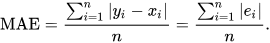

It is thus an arithmetic average of the absolute errors image.png where y<sub>i</sub> is the prediction and x<sub>i</sub>  the true value. Alternative formulations may include relative frequencies as weight factors. The mean absolute error uses the same scale as the data being measured.

* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)

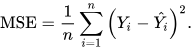

In other words, the MSE is the mean image.png of the errors
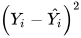. This is an easily computable quantity for a particular sample (and hence is sample-dependent).

In [25]:
cpu_law['log2_prediction']=lRegr.predict(cpu_law[['Date of introduction']])     # make predictions and add to new column "log2_prediction"

# calculate error - (y_true - y_predicted )
cpu_law['error']=cpu_law['log2 of Transistor count']-cpu_law['log2_prediction'] # calculate error = (y_true - y_predicted )
cpu_law['absolute_error']=np.abs(cpu_law['error'])                              # calculate absolute error = |y_true - y_predicted|
cpu_law['squared_error']=np.square(cpu_law['error'])                            # calculate square error = (y_true - y_predicted)^2
mean_absolute_error=cpu_law['absolute_error'].mean()                            # so, mean absolute error = mean(|y_true - y_predicted |)
mean_square_error=cpu_law['squared_error'].mean()                               # so, maen square error = mean((y_true - y_predicted)^2)
print('Mean absolute error:',mean_absolute_error)                               # make print mean absolute error
print('Mean squared error:',mean_square_error)                                  # make print mean squared error

Mean absolute error: 1.032207023897309
Mean squared error: 2.2453041727042256


### make plot predictions

In [ ]:
# make plot in logarithm scale
ax=cpu_law.plot.scatter(x='Date of introduction',y='log2 of Transistor count',color='r',marker='x',s=10)# plot using pandas.DataFrame object
cpu_law.plot(x='Date of introduction',y='log2_prediction',color='green',ax=ax)  # make plot predictions
plt.xlabel('Date of introduction'),plt.ylabel('log2 of Transistor count')       # add axis labels
plt.grid(),plt.title('Moore\'s law (logarithm scale)')                          # add grid and title to plot
plt.show()                                                                      # make show plot

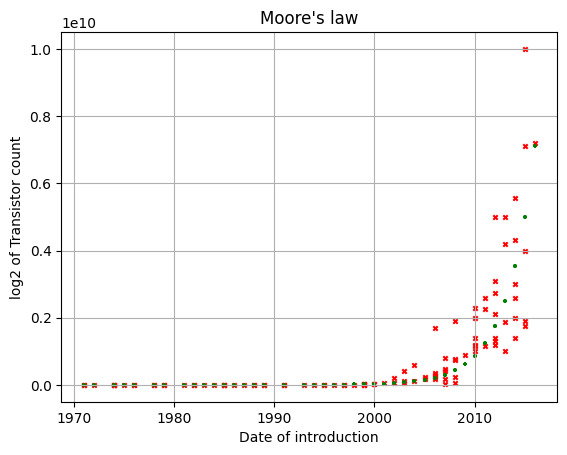

In [34]:
# make plot in linear scale
cpu_law.plot.scatter(x='Date of introduction',y='Transistor count',color='r',marker='x',s=10)# plot using pandas.DataFrame object
plt.scatter(cpu_law['Date of introduction'],np.power(2,cpu_law['log2_prediction']),color='green',marker='+',s=10)# make plot predictions
plt.xlabel('Date of introduction'),plt.ylabel('log2 of Transistor count')       # add axis labels
plt.grid(),plt.title('Moore\'s law')                                            # add grid and title to plot
plt.show()                                                                      # make show plot

# References / Further reading

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Matplotlib - Tutorials](https://matplotlib.org/stable/tutorials/index)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
* [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)